In [16]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# for configuration 

In [17]:
pytesseract.pytesseract.tesseract_cmd ="C://Users//pc//anaconda3//tesseract.exe"

# for image

In [18]:
img=cv2.imread("C://Users//pc//Desktop//image.png")

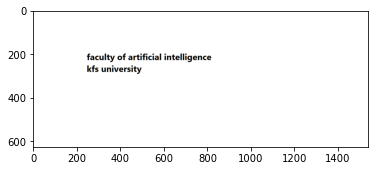

In [19]:
plt.imshow(img)

In [20]:
img2char= pytesseract.image_to_string(img)

In [21]:
print(img2char)

faculty of artificial intelligence
kfs university



In [22]:
imgbox= pytesseract.image_to_boxes(img)

In [23]:
type(imgbox)

str

In [24]:
print(imgbox)

f 247 397 263 427 0
a 263 397 282 417 0
c 285 397 302 417 0
u 297 388 314 427 0
l 305 397 325 417 0
t 329 397 353 427 0
y 354 388 376 417 0
o 388 397 400 427 0
f 388 397 427 427 0
a 438 397 457 417 0
r 450 397 467 427 0
t 461 397 475 417 0
i 476 397 500 427 0
f 502 397 518 427 0
i 519 397 526 427 0
c 529 397 546 417 0
i 549 397 556 427 0
a 559 397 578 417 0
l 582 397 589 427 0
i 604 397 611 427 0
n 615 397 635 417 0
t 638 397 652 423 0
e 654 397 674 417 0
l 677 397 684 427 0
l 688 397 706 427 0
i 709 388 731 417 0
g 724 388 741 427 0
e 734 397 754 417 0
n 757 397 777 417 0
c 780 397 797 417 0
e 799 397 819 417 0
k 249 343 265 373 0
f 249 343 285 373 0
s 285 343 301 363 0
u 315 343 335 363 0
n 339 343 359 363 0
i 363 343 370 373 0
v 372 343 394 363 0
e 389 334 406 373 0
r 395 343 415 363 0
s 418 343 449 363 0
i 452 343 459 373 0
t 462 343 476 369 0
y 477 334 499 363 0



In [25]:
imgH,imgW,_=img.shape

In [26]:
img.shape

(626, 1539, 3)

In [27]:
for boxes in imgbox.splitlines():
    boxes =boxes.split()
    x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(img,(x,imgH-y),(w,imgH-h),(0,255,0),3)

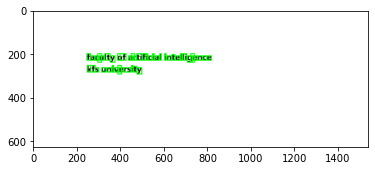

In [28]:
plt.imshow(img)

# for video

In [29]:
import cv2
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd ="C://Users//pc//anaconda3//tesseract.exe"
font_scale= 1.5
font = cv2.FONT_HERSHEY_PLAIN
cap=cv2.VideoCapture("C:\\Users\\pc\\Downloads\\IAM.mp4")
if (cap.isOpened()== False):
    print("Error opening video stream or file")
else:
    print("the video is opened...")
    while(cap.isOpened()):
        ret,frame= cap.read() 
        if ret==True:
            imgH,imgW,_=frame.shape
            x1,y1,w1,h1=0,0,imgH,imgW
            img2char= pytesseract.image_to_string(frame)
            imgbox= pytesseract.image_to_boxes(frame)
            for boxes in imgbox.splitlines():
                 boxes =boxes.split()
                 x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
                 cv2.rectangle(frame,(x,imgH-y),(w,imgH-h),(0,255,0),3)
                 cv2.putText(frame,img2char,(x1+ int(w1/50),y+int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),3)
                 cv2.imshow('IAM',frame)
            
            if cv2.waitKey(200)== ord('q'):
                break
        else:
            break

cap.release()
cv2.destroyAllWindows()   

the video is opened...


# text from live stream

In [30]:
import cv2
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd ="C://Users//pc//anaconda3//tesseract.exe"
cap=cv2.VideoCapture(0)
cntr=0
while cap.isOpened():
    ret,frame= cap.read()
    cntr=cntr+1;
    if ((cntr%20)==0):
        imgH,imgW,_=frame.shape
        x1,y1,w1,h1=0,0,imgH,imgW
        img2char= pytesseract.image_to_string(frame)
        imgbox= pytesseract.image_to_boxes(frame)
        for boxes in imgbox.splitlines():
            boxes =boxes.split()
            x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(frame,(x,imgH-y),(w,imgH-h),(0,255,0),3)
        cv2.putText(frame,img2char,(x1+ int(w1/50),y1+int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255),3)
        font = cv2.FONT_HERSHEY_PLAIN
        cv2.imshow("detect text from live",frame)
        if cv2.waitKey(1)== ord('q'):
            break
    
cap.release()
cv2.destroyAllWindows()   